## In this notebook:

### 1. Import Libraries
### 2. Import JSON file and Relevant Data
### 3. Wrangle Data
### 4. Clean Data
### 5. Create Chloropleth Map
### 6. Discussion of Results

In [1]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

## 2. Import JSON File and Relevant Data

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\Josh Wattay\CF - Flight Analysis\us-states.json'

In [4]:
country_geo

'C:\\Users\\Josh Wattay\\CF - Flight Analysis\\us-states.json'

In [5]:
# In case you want to look at the JSON file contents here too:

f = open(r'C:\Users\Josh Wattay\CF - Flight Analysis\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [6]:
path = r'C:\Users\Josh Wattay\anaconda3\Flight Delay Analysis'

In [8]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Clean Data', 'Flights_Clean.csv'))

In [9]:
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-12-02,Comair Inc.,DCA,BTV,False,False,1459,1533.0,34.0,34.0,...,1554.0,1655.0,2.0,1631,26.0,1.0,1.0,1600-1659,2,0.0
1,2018-06-30,Spirit Air Lines,ATL,LAS,False,False,1810,1833.0,23.0,23.0,...,1850.0,1951.0,4.0,1920,35.0,1.0,2.0,1900-1959,7,0.0
2,2018-02-11,Frontier Airlines Inc.,MCI,RSW,False,False,1234,1241.0,7.0,7.0,...,1249.0,1620.0,22.0,1619,23.0,1.0,1.0,1600-1659,5,0.0
3,2018-06-22,United Air Lines Inc.,DEN,CID,False,False,2017,2156.0,99.0,99.0,...,2211.0,33.0,4.0,2303,94.0,1.0,6.0,2300-2359,3,0.0
4,2018-10-19,SkyWest Airlines Inc.,BGM,DTW,False,False,1728,1725.0,0.0,-3.0,...,1733.0,1846.0,7.0,1904,-11.0,0.0,-1.0,1900-1959,2,0.0


In [10]:
df.shape

(500000, 61)

## 3. Wrangle Data

In [11]:
# Select relevant columns 

columns = ['OriginStateName', 'DestStateName', 'ArrivalDelayGroups']

In [12]:
# Create subset

state_sub = df[columns]

In [13]:
state_sub.head()

,OriginStateName,DestStateName,ArrivalDelayGroups
0,Virginia,Vermont,1.0
1,Georgia,Nevada,2.0
2,Missouri,Florida,1.0
3,Colorado,Iowa,6.0
4,New York,Michigan,-1.0


In [14]:
state_sub.columns

Index(['OriginStateName', 'DestStateName', 'ArrivalDelayGroups'], dtype='object')

In [15]:
state_sub.shape

(500000, 3)

## 3. Clean Data

In [16]:
# Search for missing values

state_sub.isnull().sum()

OriginStateName           0
DestStateName             0
ArrivalDelayGroups    15443
dtype: int64

In [17]:
# Impute median for missing values found above

state_sub['ArrivalDelayGroups'].fillna(state_sub['ArrivalDelayGroups'].median(), inplace=True)

C:\Users\Josh Wattay\AppData\Local\Temp\ipykernel_10548\3640962824.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  state_sub['ArrivalDelayGroups'].fillna(state_sub['ArrivalDelayGroups'].median(), inplace=True)
C:\Users\Josh Wattay\AppData\Local\Temp\ipykernel_10548\3640962824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_sub['A

In [18]:
# Search again for null values

state_sub.isnull().sum()

OriginStateName       0
DestStateName         0
ArrivalDelayGroups    0
dtype: int64

In [19]:
# Search for duplicates

dups = state_sub.duplicated()

In [20]:
dups.shape # no dups

(500000,)

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ArrivalDelayGroups', ylabel='Count'>

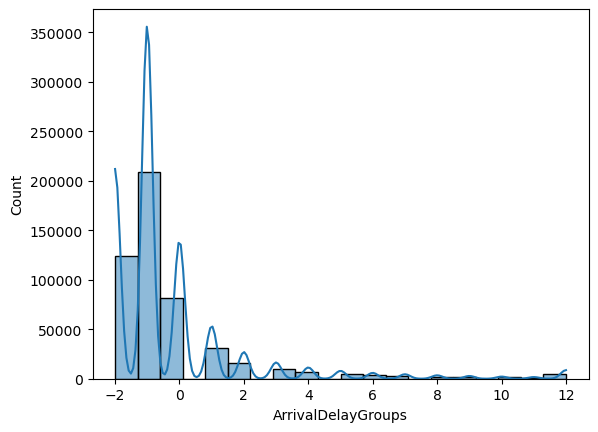

In [21]:
# Search for Extreme Values

sns.histplot(state_sub['ArrivalDelayGroups'], bins=20, kde = True) # shows extreme values for 'ArrivalDelayGroups'

### Important Note: Arrival Delay Groups are defined as Arrival Delay intervals, every (15-minutes from <-15 to >180). In other words, the groups between -2 and 0 are flights that actually arrived earlier than anticipated by 15 minutes or less. Whereas, group 12 represents flights delayed by 180 minutes. The good news here is that most flights are arriving earlier than anticipated, and there are no extreme values detected.

### For the purposes of this map, I will select only entries for delayed flights with an Arrival Delay Group > 0. 

In [22]:
# Select only entries with a non-zero rating

state_sub = state_sub[state_sub['ArrivalDelayGroups'] >= 1]

In [23]:
state_sub.dtypes

OriginStateName        object
DestStateName          object
ArrivalDelayGroups    float64
dtype: object

In [24]:
state_sub.shape

(84976, 3)

## 5. Create Chloropleth Map

In [25]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = state_sub[['DestStateName','ArrivalDelayGroups']]
data_to_plot.head()

,DestStateName,ArrivalDelayGroups
0,Vermont,1.0
1,Nevada,2.0
2,Florida,1.0
3,Iowa,6.0
6,Texas,5.0


In [26]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['DestStateName','ArrivalDelayGroups'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Delay Groups").add_to(map)
folium.LayerControl().add_to(map)

map

In [31]:
# Save the map to an HTML file
output_folder = r"C:\Users\Josh Wattay\anaconda3\Flight Delay Analysis\04 Analysis" 

# Define the output file path
output_file = os.path.join(output_folder, "destination_delay_groups_chloropleth_map.html")

# Save the map to the HTML file
map.save(output_file)

## 6. Discussion of Results

### Additional Legend for Delay Groups
### Delay Group 1 = delay of 1-15 minutes
### Delay Group 2 = delay of 16-30 minutes
### Delay Group 3 = delay of 31-45 minutes
### Delay Group 4 = delay of 46-60 minutes
### Delay Group 5 = delay of 61-75 minutes
### Delay Group 6 = delay of 76-90 minutes
### Delay Group 7 = delay of 91-105 minutes
### Delay Group 8 = delay of 106-120 minutes
### Delay Group 9 = delay of 121-135 minutes
### Delay Group 10 = delay of 136-150 minutes
### Delay Group 11 = delay of 151-165 minutes
### Delay Group 12 = delay of 166-180 minutes

### States containing flights in delay Group 12 include: Iowa, Oklahoma, Montana, Nevada, Virginia, and Wisconsin. Three of these states experience harsh winters in which snowfall could be the cause of such a lenghty delay. Those states are Iowa, Montana, and Wisconsin. Nevada experiences extreme heat during the summer, which may be the cause of such lengthy delays. Additionally, Oklahoma has a dangerous tornado season during the Summer which typically causes catastrophic damage with tornadoes spawned by large storm cells. Virginia does not typically experience extreme weather, however, it does experience snowfall which it may not be as equipped for compared to states in the Northeastern or New England region of the country. 

### This analysis answers the question of delay performance based on region of the country since there are clusters of states in certain regions that have flights in higher delay groups. Cluster 1 being in the Pacific Northwest. This region includes the most states on the map with Alaska, Idaho, Montana, Nevada, Oregon, Washington, and Wyoming. Cluster 2 being in the Midwest. This region includes Arkansas, Iowa, Missouri, Oklahoma, Texas, and Wisconsin. Cluster 3 being in the Mid-Atlantic/Southeast with Florida, North Carolina, South Carolina, Virginia, and West Virginia. Cluster 4 being in the Northeast with Massachussets, New Jersey, New York, and Vermont. 

### These findings raise two important questions. First, what is the ratio of delays in these clusters caused by weather? Second, what time of year does each cluster perform better and/or worse as it relates to flight delays and cancellations?